In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import StandardScaler

In [103]:
df = pd.read_csv("데이터분석 분야_로우데이터/od_20231001_15/od_20231007_1.csv")

In [104]:
df

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
0,1135064000,1135069500,20231007,19:00,19:00,1,2,0.0,4.0,4,11015,16,17
1,5013061000,5013031000,20231007,15:00,16:00,0,4,0.0,5.0,5,43766,38,7
2,3611052000,3611038000,20231007,10:00,13:00,0,1,0.0,0.0,4,42424,194,7
3,4111158000,4111568000,20231007,16:00,16:00,0,4,0.0,0.0,0,2999,3,6
4,4315025000,4315056000,20231007,14:00,14:00,1,0,1.0,4.0,0,13222,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553364,4136051000,4136053000,20231007,15:00,16:00,0,1,1.0,0.0,4,15824,21,5
3553365,2671025900,2635061000,20231007,21:00,22:00,1,5,1.0,5.0,5,28611,52,5
3553366,4785025600,4719058300,20231007,12:00,12:00,1,4,0.0,0.0,4,17722,24,5
3553367,2818576100,2818576300,20231007,19:00,19:00,0,1,0.0,0.0,0,1348,1,5


### 행정도 자르기 + 목적

In [106]:
a = df[df["dest_hdong_cd"].astype(str).isin(["1117056000", "1117057000", "1156054000", "1165055000", "1165056000", "1165057000",
                                             "1117063000", "1117064000", "1159060500", "1159051000"])]

aa = a[(a['dest_purpose'].astype(str).isin(["4", "5"])) | (a['origin_purpose'].astype(str) == "4")]

move = aa[aa['end_time'].isin(["17:00", "18:00", "19:00", "20:00"])]

In [107]:
move

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
99,1156056000,1156054000,20231007,18:00,19:00,1,2,0.0,0.0,4,33425,58,9
266,1165058100,1165057000,20231007,17:00,18:00,1,2,0.0,4.0,4,47830,61,7
749,1117064000,1117063000,20231007,18:00,18:00,1,4,0.0,5.0,5,3926,6,7
946,4148057000,1117063000,20231007,15:00,17:00,1,1,0.0,0.0,5,71060,132,6
2634,1159063000,1117063000,20231007,17:00,18:00,1,0,1.0,0.0,4,43707,54,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551671,4113558000,1165057000,20231007,18:00,19:00,0,3,0.0,4.0,5,98333,73,5
3552126,1171067000,1159060500,20231007,19:00,19:00,1,2,2.0,0.0,4,22511,44,5
3552201,4161061000,1165057000,20231007,17:00,19:00,0,3,0.0,4.0,5,135789,73,5
3552418,4157025300,1156054000,20231007,16:00,18:00,0,2,0.0,5.0,4,199309,110,5


In [108]:
# groupby로 합계 구하기
group = move.groupby(['end_time', 'gender', 'age', 'modal', 'origin_purpose', 'dest_purpose'])['od_cnts'].sum().reset_index()

# 원본 DataFrame과 groupby 결과 병합하기
move = move.merge(group, on=['end_time', 'gender', 'age', 'modal', 'origin_purpose', 'dest_purpose'], suffixes=('', '_sum'))

In [121]:
move = move[~move['modal'].isin([4, 6, 7])]

In [126]:
move

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts,od_cnts_sum
0,1156056000,1156054000,20231007,18:00,19:00,1,2,0.0,0.0,4,33425,58,9,388
1,1165058100,1165057000,20231007,17:00,18:00,1,2,0.0,4.0,4,47830,61,7,948
2,1117064000,1117063000,20231007,18:00,18:00,1,4,0.0,5.0,5,3926,6,7,141
3,4148057000,1117063000,20231007,15:00,17:00,1,1,0.0,0.0,5,71060,132,6,208
4,1159063000,1117063000,20231007,17:00,18:00,1,0,1.0,0.0,4,43707,54,27,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,4113558000,1165057000,20231007,18:00,19:00,0,3,0.0,4.0,5,98333,73,5,15
7913,1171067000,1159060500,20231007,19:00,19:00,1,2,2.0,0.0,4,22511,44,5,137
7914,4161061000,1165057000,20231007,17:00,19:00,0,3,0.0,4.0,5,135789,73,5,15
7915,4157025300,1156054000,20231007,16:00,18:00,0,2,0.0,5.0,4,199309,110,5,15


### 군집분석

In [128]:
move.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7491 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   origin_hdong_cd  7491 non-null   int64  
 1   dest_hdong_cd    7491 non-null   int64  
 2   date             7491 non-null   int64  
 3   start_time       7491 non-null   object 
 4   end_time         7491 non-null   object 
 5   gender           7491 non-null   int64  
 6   age              7491 non-null   int64  
 7   modal            7491 non-null   float64
 8   origin_purpose   7491 non-null   float64
 9   dest_purpose     7491 non-null   int64  
 10  od_dist_avg      7491 non-null   int64  
 11  od_duration_avg  7491 non-null   int64  
 12  od_cnts          7491 non-null   int64  
 13  od_cnts_sum      7491 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 877.9+ KB


In [142]:
# 필요한 라이브러리 임포트
import numpy as np
from sklearn.preprocessing import StandardScaler

# 지역 코드 할당 함수 정의 (주어진 코드를 유지)
def assign_region_code(hdong_cd):
    if hdong_cd in [1117063000, 1117064000]:
        return 0
    elif hdong_cd == 1156054000:
        return 1
    elif hdong_cd in [1165055000, 1165057000]:
        return 2
    elif hdong_cd == 1159051000:
        return 3
    elif hdong_cd == 1159060500:
        return 4
    elif hdong_cd == 1117057000:
        return 5

# od_df에서 특정 값 필터링 (필터링 과정 유지)
filtered_od = od_df[od_df['dest_hdong_cd'].isin([1156054000, 1117063000, 1117064000, 
                                                 1165055000, 1165057000, 1159051000, 
                                                 1159060500, 1117057000])]
filtered_od = filtered_od[filtered_od['dest_purpose'].isin([4, 5])]

# 지역 코드 할당
filtered_od['region_code'] = filtered_od['dest_hdong_cd'].apply(assign_region_code)

# 선택한 열로 스케일링 진행
selected_columns = filtered_od[['od_duration_avg', 'od_dist_avg']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_columns)

# 각 데이터를 재구성
a = filtered_od['region_code'].values.reshape(-1, 1)  # region_code
b = filtered_od['age'].values.reshape(-1, 1)  # age
c = filtered_od['modal'].values.reshape(-1, 1)  # modal
d = filtered_od['gender'].values.reshape(-1, 1)  # gender
e = filtered_od['origin_purpose'].values.reshape(-1, 1)  # origin_purpose
f = filtered_od['dest_purpose'].values.reshape(-1, 1)  # dest_purpose
g = filtered_od['od_cnts_sum'].values.reshape(-1, 1)  # od_cnt_sum

# 최종 데이터 결합 (X)
X = np.hstack((a, b, c, d, e, f, g, scaled_data))

# Y는 지역 코드 (지역 값을 예측할 목적이라면 y = 지역 코드)
y = filtered_od['region_code'].values

주성분 1: 누적 설명된 분산 비율 = 0.9998
주성분 2: 누적 설명된 분산 비율 = 0.9999
주성분 3: 누적 설명된 분산 비율 = 0.9999
주성분 4: 누적 설명된 분산 비율 = 1.0000
주성분 5: 누적 설명된 분산 비율 = 1.0000
주성분 6: 누적 설명된 분산 비율 = 1.0000
주성분 7: 누적 설명된 분산 비율 = 1.0000
주성분 8: 누적 설명된 분산 비율 = 1.0000
주성분 9: 누적 설명된 분산 비율 = 1.0000


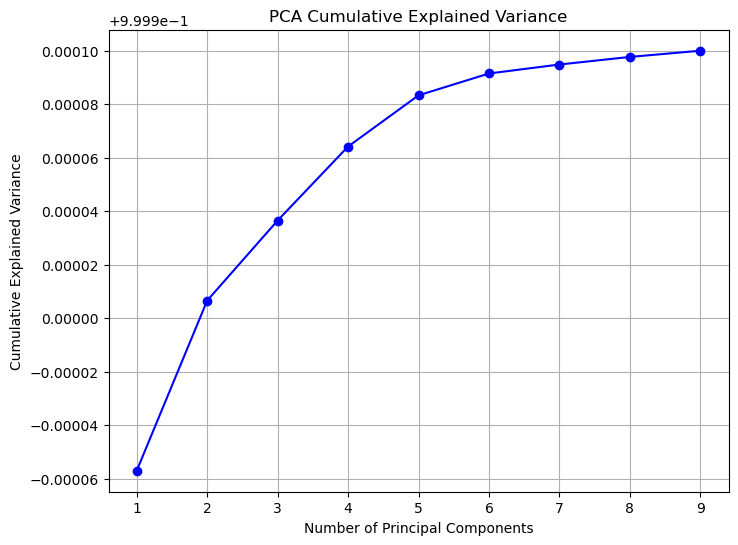

In [144]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# PCA 실행
pca = PCA()
pca_data = pca.fit_transform(X)  # X는 결합된 processed_data

# 설명된 분산 비율과 누적 설명된 분산 비율 계산
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 누적 설명된 분산 비율 출력
for i, ratio in enumerate(cumulative_variance_ratio):
    print(f"주성분 {i+1}: 누적 설명된 분산 비율 = {ratio:.4f}")

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))
plt.grid(True)
plt.show()


C:\Users\DIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

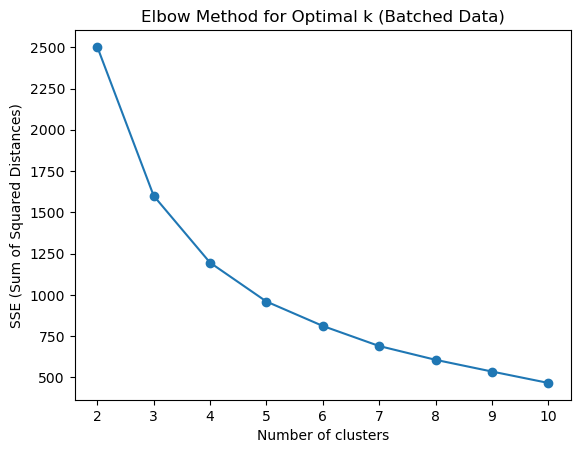

Enter the optimal number of clusters:  3


평균 실루엣 점수: 0.4257729436262375


C:\Users\DIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [156]:
processed_data = processed_data[~np.isnan(processed_data).any(axis=1)]

batch_size = 1000

sse = []
silhouette_scores = []

# 배치 단위로 SSE를 계산하여 Elbow Method를 사용해 최적의 클러스터 수(k)를 찾기
for start in range(0, len(processed_data), batch_size):
    batch_data = processed_data[start:start + batch_size]
    
    # 주성분 수를 2로 설정
    pca = PCA(n_components=2)
    pca_batch_data = pca.fit_transform(batch_data)
    
    batch_sse = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(pca_batch_data)
        batch_sse.append(kmeans.inertia_)
    sse.append(batch_sse)

# 각 배치의 SSE 평균을 계산하여 Elbow Method 그래프 그리기
avg_sse = np.mean(sse, axis=0)
plt.plot(range(2, 11), avg_sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k (Batched Data)')
plt.show()

# 최적의 클러스터 수를 사용자 입력으로 받기
optimal_k = int(input("Enter the optimal number of clusters: "))

# 배치 단위로 실루엣 점수 계산
for start in range(0, len(processed_data), batch_size):
    batch_data = processed_data[start:start + batch_size]
    
    # 주성분 수를 2로 설정
    pca = PCA(n_components=2)
    pca_batch_data = pca.fit_transform(batch_data)
    
    # 최적의 클러스터 수로 KMeans 클러스터링 수행
    kmeans = KMeans(n_clusters=optimal_k, random_state=0)
    clusters = kmeans.fit_predict(pca_batch_data)
    
    # 실루엣 점수 계산
    sil_score = silhouette_score(pca_batch_data, clusters)
    silhouette_scores.append(sil_score)

# 평균 실루엣 점수 출력
avg_silhouette_score = np.mean(silhouette_scores)
print(f"평균 실루엣 점수: {avg_silhouette_score}")


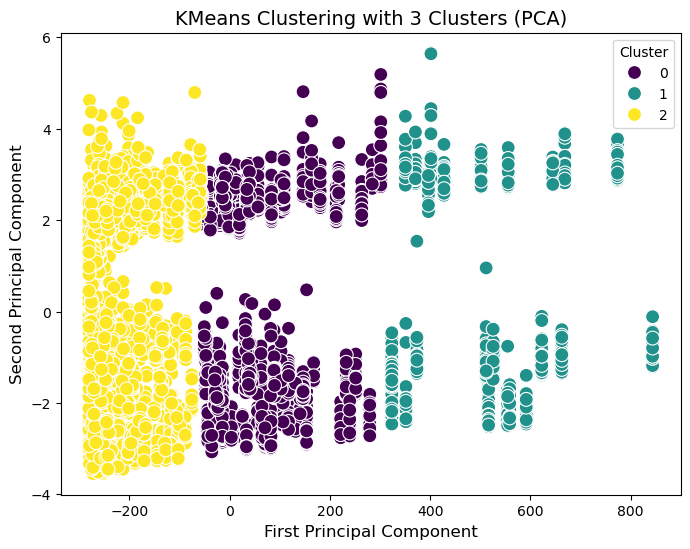

In [158]:
# 필요한 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# 실루엣 점수가 높은 5개 클러스터 선택
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(pca_data)

# 그래프 그리기
plt.figure(figsize=(8, 6))

# 클러스터링 결과를 시각화
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis', legend='full', s=100)

# 제목 및 축 레이블 설정
plt.title(f'KMeans Clustering with {optimal_k} Clusters (PCA)', fontsize=14)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)

# 범례 위치 설정
plt.legend(title='Cluster', loc='upper right')

# 그래프 출력
plt.show()
